In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
matplotlib.style.use('seaborn')
%matplotlib inline
from matplotlib.pylab import rcParams
#rcParams['figure.figsize'] = 15, 5
# from plotly.graph_objs import *
# from plotly.offline import init_notebook_mode, iplot, iplot_mpl
# init_notebook_mode()
from tqdm import tqdm
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import yfinance as yf
import datetime
TodayDate = datetime.date.today()

# HW first df
df = yf.download("AAPL", start="2015-01-01", end="2022-04-01",group_by="ticker")

# int(len(df2)*0.8) is the same as 1472
X_train, X_test = df[0:1472], df[1472:]
X_train.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
X_test.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
# X_test.tail(3)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# hw: second df

df2 = yf.download("AAPL", start="2015-01-01", end=TodayDate,group_by="ticker")
df2.tail(3)

X_train2, X_test2 = df2[0:1472], df2[1472:]
X_train2.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
X_test2.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
# X_train2.tail(3)
#X_test2.tail(3)
# X_test2.to_excel("testingoutput.xlsx")
X_test3 = pd.read_excel('adddates.xlsx', index_col=0)
X_test4 = pd.concat([X_test2, X_test3], ignore_index = False, axis = 0 , join="outer")
# X_test4.tail(3)

[*********************100%***********************]  1 of 1 completed


<Figure size 864x576 with 0 Axes>

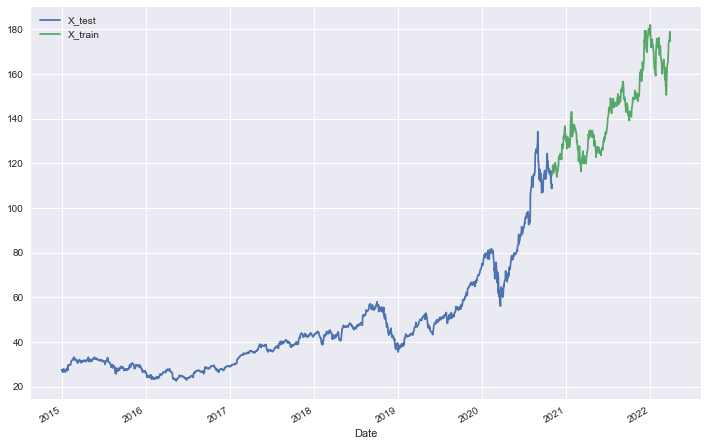

In [ ]:
plt.figure(figsize =(12, 8));
ax = X_train.plot(grid=True, figsize = (12, 8));
X_test.plot(ax=ax, grid=True);
plt.legend(['X_test', 'X_train']);
plt.show()

In [ ]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
# model build

model = auto_arima(X_train, trace=True, error_action='ignore',suppress_warnings=True)
model.fit(X_train)
forecast = model.predict(n_periods=len(X_test4))
forecast = pd.DataFrame(forecast, index = X_test4.index, columns=['Prediction'])
forecast.tail(5)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4541.303, Time=1.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4633.659, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4599.600, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4603.048, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4635.079, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4600.887, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4600.955, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4533.791, Time=1.30 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4602.952, Time=0.12 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=4575.495, Time=1.61 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4545.304, Time=1.53 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4534.238, Time=1.11 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=4574.967, Time=0.79 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=4565.218, Time=1.77 sec
 ARIMA(3,1,2)(0,0,0)[0]          

,Prediction
Date,
2022-09-26,136.528891
2022-09-27,136.587174
2022-09-28,136.636818
2022-09-29,136.699998
2022-09-30,136.746563


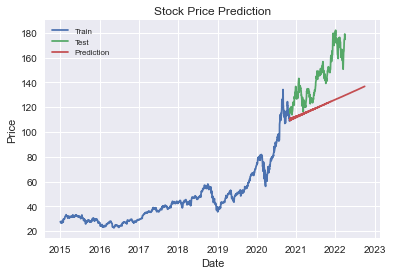

In [ ]:
# plot the predictions for validation set

plt.plot(X_train, label='Train')
plt.plot(X_test, label='Test')
plt.plot(forecast, label='Prediction')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()